In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pingouin as pg
import scikit_posthocs as sp
from scipy import stats
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef

In [2]:
rank_df = pd.DataFrame(np.array([[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
                                ['best-plainwaltz', 'best-plainwaltz', 'best-plainwaltz', 'best-plainwaltz', 'best-plainwaltz', 'best', 'best', 'best', 'best', 'best', 'aggreprot-clone', 'aggreprot-clone', 'aggreprot-clone', 'aggreprot-clone', 'aggreprot-clone'],
                                [0.4767, 0.4878, 0.4733, 0.5289, 0.5045, 0.6541, 0.6779, 0.6717, 0.6865, 0.702, 0.6607, 0.6675, 0.621, 0.575, 0.633],
                                [0.808, 0.819, 0.815, 0.828, 0.827, 0.896, 0.895, 0.902, 0.895, 0.898, 0.845, 0.862, 0.813, 0.765, 0.837]]).T, columns=['cv_cycle', 'method', 'roc_auc_amypro', 'roc_auc_serrano'])
rank_df['roc_auc_amypro'] = pd.to_numeric(rank_df['roc_auc_amypro'])
rank_df['roc_auc_serrano'] = pd.to_numeric(rank_df['roc_auc_serrano'])

In [3]:
rank_df

,cv_cycle,method,roc_auc_amypro,roc_auc_serrano
0,1,best-plainwaltz,0.4767,0.808
1,2,best-plainwaltz,0.4878,0.819
2,3,best-plainwaltz,0.4733,0.815
3,4,best-plainwaltz,0.5289,0.828
4,5,best-plainwaltz,0.5045,0.827
5,1,best,0.6541,0.896
6,2,best,0.6779,0.895
7,3,best,0.6717,0.902
8,4,best,0.6865,0.895
9,5,best,0.7020,0.898


In [4]:
def make_boxplots(df):
    """
    Plot box plots showing comparisons of [roc_auc, pr_auc, mcc], p-value for Friedman's test is shown as the plot title
    :param df: input dataframe, must contain [cv_cycle, method, roc_auc, pr_auc, mcc]
    """
    sns.set_context('notebook')
    sns.set(rc={'figure.figsize': (4, 3)}, font_scale=1.5)
    sns.set_style('whitegrid')
    figure, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 8))
    
    titles = ['amypro unweighted tensor', 'serrano']
    colors = ['red', 'orange', 'darkblue']
    for i, stat in enumerate(["roc_auc_amypro", "roc_auc_serrano"]):
        friedman = pg.friedman(df, dv=stat, within="method", subject="cv_cycle")['p-unc'].values[0]
        ax = sns.boxplot(y=stat, x="method", ax=axes[i], data=df, hue="method", palette=colors)
        title = stat.replace("_", " ").upper()
        ax.set_title(f"{titles[i]} (p={friedman:.03f})")
        ax.set_xlabel("")
        ax.set_ylabel('ROC AUC')
        ax.set_ylim(0, 1)
    plt.tight_layout()

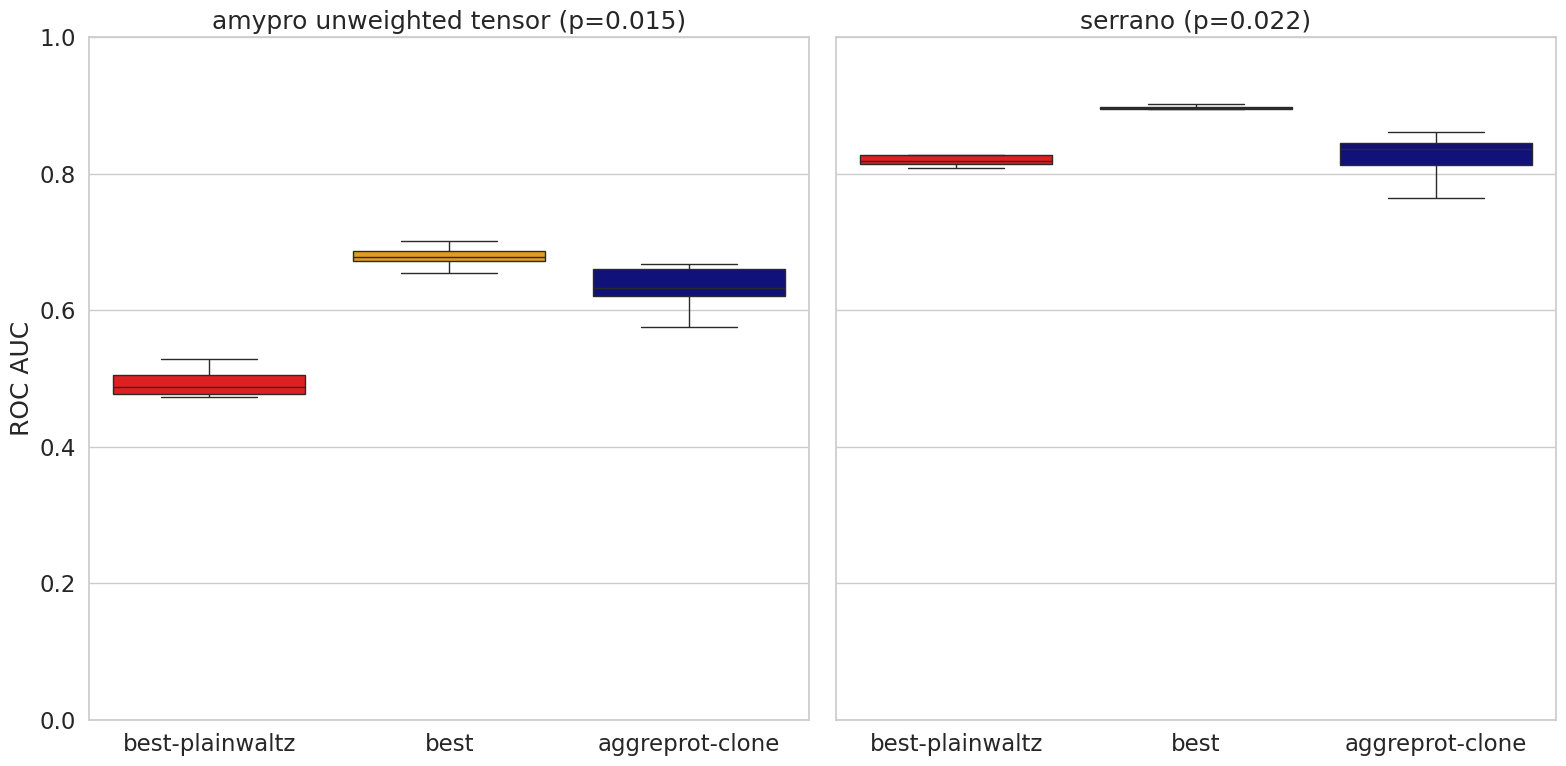

In [5]:
make_boxplots(rank_df)

In [14]:
rank_df[(rank_df['method']=='aggreprot-clone') | (rank_df['method']=='best')]
friedman = pg.friedman(rank_df, dv='roc_auc_amypro', within="method", subject="cv_cycle")['p-unc'].values[0]
friedman

0.006737946999085468